# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**.

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%shell
jupyter nbconvert --to html Reference_Notebook_Facial_Emotion_Detection_Milestone+1.ipynb

[NbConvertApp] Converting notebook Reference_Notebook_Facial_Emotion_Detection_Milestone+1.ipynb to html
[NbConvertApp] Writing 1069438 bytes to Reference_Notebook_Facial_Emotion_Detection_Milestone+1.html


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from sklearn.metrics import confusion_matrix, classification_report

### **Let us load the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Collab Notebooks/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

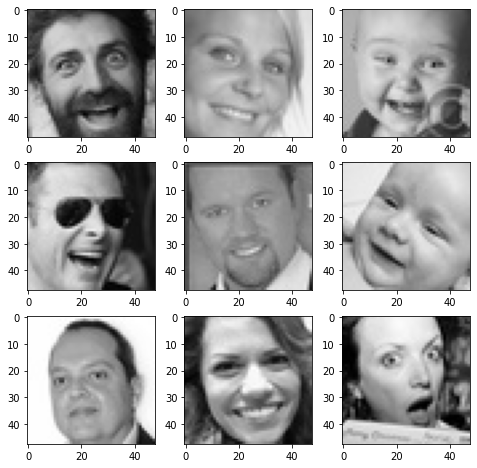

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- Identifying teeth showing can help identify happy people
- A mouth curve upwards can be also be a sign that the person is happy
- And when smiling, some wrinkles can be found under the eyes and next to the mouth




### **Sad**

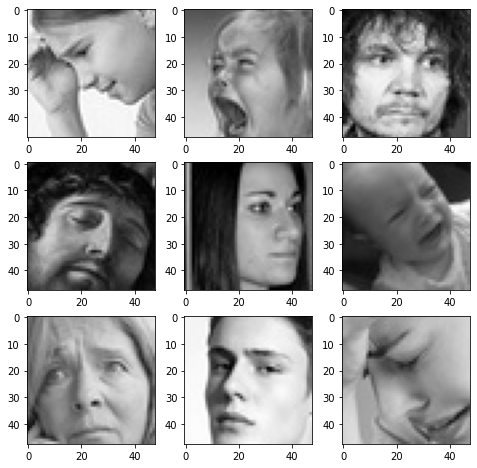

In [ ]:
# Write your code to visualize images from the class 'sad'.
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- The eyes tend to be closer together or completely closed if the person is crying
- The mouth is straight

### **Neutral**

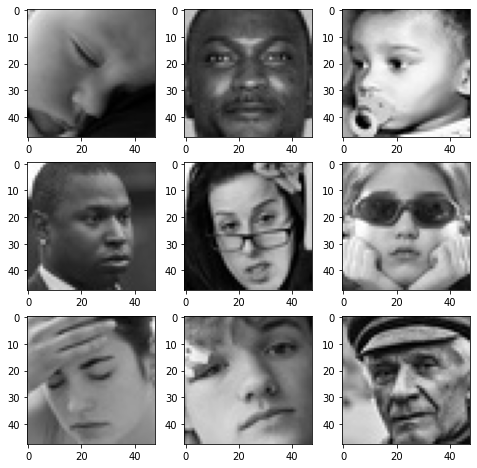

In [ ]:
# Write your code to visualize images from the class 'neutral'.
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- Open eyes and straight mouth no expression

### **Surprised**

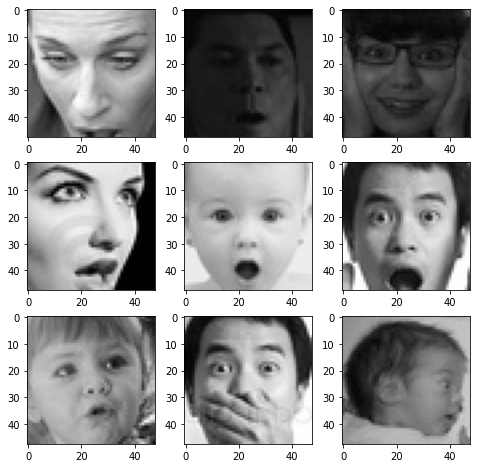

In [ ]:
# Write your code to visualize images from the class 'surprise'.
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- Easier to identify, people with wide open mouth
- Hands on their cheeks or covering the mouth
- Very opened eyes

## **Checking Distribution of Classes**

In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


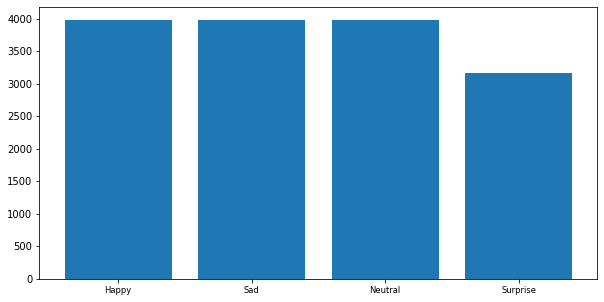

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**

The dataset is almost equally balanced for happy, sad and neutral images but the surprise emotion is less represented with approximately 800 pictures less than the other 3 emotions (20% less samples).

If the difference in #samples for a class is too big, this may affect the performance of the model. An option to compensate for this unbalance would be to use a custom weighted loss function. F1 score is also a better assesment metric to use for inbalanced datasets over the accuracy which can be misleading. Another option in CNNs modeling is data augmentation of the underrepresented class.


**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
The inbalance does not appear to be that high but it may affect the performance of the model.
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?
Normalization, data augmentation to prepare images for feature extraction.
Plotting the images might give us some insights into what kind of transformations or fiters make more sense to use.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

> CNNs are a better approach when working with data representations difficult to encode e.g. images, audio... The advantages of CNNs over ANNs are:


>> - Capture the spatial structure of an image e.g. detect a mouth under a nose
> - Parameter sharing: Weightes are applied to all the image while in ANNs each component is multiplied by an independent weight. This is why CNNs are computationally more effective.

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [ ]:
# Initializing a Sequential Model
model1 = Sequential()

# Add the first Convolutional block
model1.add(Conv2D(64, kernel_size=(2,2), padding='same', input_shape=(48,48,1), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
# Add the second Convolutional block
model1.add(Conv2D(32, kernel_size=(2,2), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
# Add the third Convolutional block
model1.add(Conv2D(32, kernel_size=(2,2), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
# Add the Flatten layer
model1.add(Flatten())
# Add the first Dense layer
model1.add(Dense(521, activation='relu'))
model1.add(Dropout(0.4))
# Add the Final layer
model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

*   RGB #parameters: 616M
*   Grayscale #parameters: 615.5M

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 30

In [ ]:
# Write your code to compile your model1. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.
history = model1.fit(train_set, epochs=15, validation_data=validation_set)

Epoch 1/15
473/473 [==============================] - 15s 32ms/step - loss: 0.6504 - accuracy: 0.7388 - val_loss: 0.7932 - val_accuracy: 0.6856
Epoch 2/15
473/473 [==============================] - 15s 31ms/step - loss: 0.6506 - accuracy: 0.7342 - val_loss: 0.7806 - val_accuracy: 0.6880
Epoch 3/15
473/473 [==============================] - 15s 32ms/step - loss: 0.6537 - accuracy: 0.7326 - val_loss: 0.7770 - val_accuracy: 0.6916
Epoch 4/15
473/473 [==============================] - 16s 34ms/step - loss: 0.6457 - accuracy: 0.7363 - val_loss: 0.7829 - val_accuracy: 0.6982
Epoch 5/15
473/473 [==============================] - 15s 32ms/step - loss: 0.6546 - accuracy: 0.7354 - val_loss: 0.7706 - val_accuracy: 0.6994
Epoch 6/15
473/473 [==============================] - 15s 32ms/step - loss: 0.6314 - accuracy: 0.7415 - val_loss: 0.7715 - val_accuracy: 0.6896
Epoch 7/15
473/473 [==============================] - 15s 32ms/step - loss: 0.6329 - accuracy: 0.7425 - val_loss: 0.7865 - val_accuracy:

**Observations and Insights:**
- The accuracy increases with each epoch until reaching 65% of accuracy in last epoch. The validation accuracy is higher than the training accuracy so there is no sign of overfitting. However, the accuracy is not that high, the model could be further improved adding more filters to the convolutional layers, using batch normalization, adding more hidden layers in the dense layers...

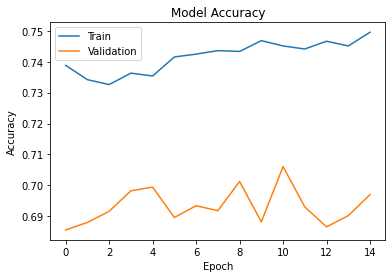

In [ ]:
#30 epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [ ]:
#20 epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the Model on the Test Set**

              precision    recall  f1-score   support

           0       0.30      0.31      0.31        32
           1       0.18      0.22      0.20        32
           2       0.23      0.22      0.23        32
           3       0.30      0.25      0.27        32

    accuracy                           0.25       128
   macro avg       0.25      0.25      0.25       128
weighted avg       0.25      0.25      0.25       128



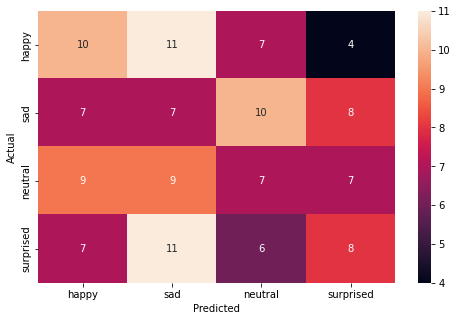

In [ ]:
# Write your code to evaluate your model on test data.
pred_test = model1.predict(test_set)
pred_test_classes = np.argmax(pred_test, axis=1)

print(classification_report(test_set.classes, pred_test_classes))
#Plotting heatmap using confusion matrix
cm = confusion_matrix(test_set.classes, pred_test_classes)
plt.figure(figsize=(8,5))

emotion_classes = ["happy", "sad", "neutral", "surprised"]
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

RGB:
- The accuracy of the model (26%) is extremelly poor. The model recognizes only 26% of the emotions in the pictures right.
- The emotion worst recognized is the neutral one with a precision of 19% and recall of 22%. Neutral faces are many times classified as sad and happy faces many times classified as neutral.

Greyscale:
- Accuracy is still bad: 27%.

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [ ]:
# Creating sequential model
model2 = Sequential()

# Add the first Convolutional block
model2.add(Conv2D(256, kernel_size=(2,2), padding='same', input_shape=(48,48,1), activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2,2))
# Add the second Convolutional block
model2.add(Conv2D(128, kernel_size=(2,2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2,2))
# Add the third Convolutional block
model2.add(Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2,2))
# Add the fourth Convolutional block
model2.add(Conv2D(32, kernel_size=(2,2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2,2))
# Add the Flatten layer
model2.add(Flatten())
# Adding the Dense layers
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'.
model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Write your code to fit your model2. Use train_set as the training data and validation_set as the validation data. Train your model for 20 epochs.
history = model2.fit(train_set, epochs=20, validation_data=validation_set)

Epoch 1/20
473/473 [==============================] - 19s 40ms/step - loss: 0.7003 - accuracy: 0.7088 - val_loss: 0.7984 - val_accuracy: 0.6691
Epoch 2/20
473/473 [==============================] - 19s 40ms/step - loss: 0.6824 - accuracy: 0.7114 - val_loss: 0.8282 - val_accuracy: 0.6608
Epoch 3/20
473/473 [==============================] - 19s 39ms/step - loss: 0.6642 - accuracy: 0.7179 - val_loss: 0.8807 - val_accuracy: 0.6411
Epoch 4/20
473/473 [==============================] - 20s 42ms/step - loss: 0.6447 - accuracy: 0.7279 - val_loss: 0.7922 - val_accuracy: 0.6868
Epoch 5/20
473/473 [==============================] - 20s 42ms/step - loss: 0.6318 - accuracy: 0.7375 - val_loss: 0.7776 - val_accuracy: 0.6932
Epoch 6/20
473/473 [==============================] - 18s 39ms/step - loss: 0.6159 - accuracy: 0.7443 - val_loss: 0.7950 - val_accuracy: 0.6841
Epoch 7/20
473/473 [==============================] - 19s 39ms/step - loss: 0.6029 - accuracy: 0.7482 - val_loss: 0.7657 - val_accuracy:

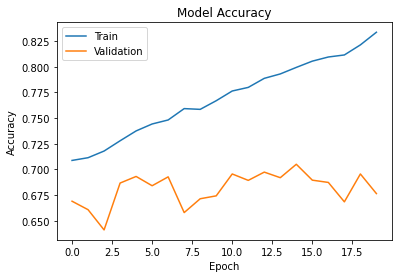

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the Model on the Test Set**

              precision    recall  f1-score   support

           0       0.13      0.12      0.13        32
           1       0.25      0.28      0.26        32
           2       0.29      0.31      0.30        32
           3       0.22      0.19      0.20        32

    accuracy                           0.23       128
   macro avg       0.22      0.23      0.22       128
weighted avg       0.22      0.23      0.22       128



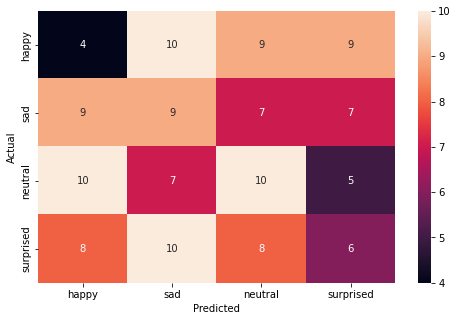

In [ ]:
# Write your code to evaluate model's test performance
pred_test = model2.predict(test_set)
pred_test_classes = np.argmax(pred_test, axis=1)

print(classification_report(test_set.classes, pred_test_classes))
#Plotting heatmap using confusion matrix
cm = confusion_matrix(test_set.classes, pred_test_classes)
plt.figure(figsize=(8,5))

emotion_classes = ["happy", "sad", "neutral", "surprised"]
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

RGB: The training accuracy is higher than the training accuracy which is a sign of an overfitted model. Some possibilities to solve overfitting problem:
- Reduce overfitting by increasing training data e.g. resplitting the datasets into 80/20 instead of 75/25 split. Or use data augmentation techniques on the images.
- Decrease network complexity (the more layers, the more arbritary functions the model is able to simulate, the more probable overfitting is).
- Change model: Adding dropouts, loss function regularization...

The accuracy on the test set is of 23% (very bad). This might be a consequence of overfitting, the model is performing too well on the training set and therefore it is not generalizing the problem and performing very bad in the testing data.

Grayscale: 28% accuracy.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
No. As we said before probably because of overfitting problem. CNNs are difficult to model so a better approach would be to use a pretrained model as initial estimation and work with that one as baseline.
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?
The model trained with the grayscale mode had overall better performance. Probably since the images are in black and white, the rgb do not give much extra information.


### <u>**Proposed Approach**</u>

- **Potential techniques:** What different techniques should be explored?<br>
Using transfer learning e.g. VGG16 to train the algorithm.
- **Overall solution design:** What is the potential solution design?<br>
Using a pretrained high-accuracy algortihm e.g. VGG16 as an initial point for feature extraction. Finetune the parameters of the pretrained algorithm for our new task and add a classification algorithm (ANN) to it to use the encoded image and classify it into one of the 4 classes (emotions).
- **Measures of success:** What are the key measures of success to compare different techniques?<br>
We can use accuracy as the main measure of success. In this case, recall is not that important since there false negatives do not have greater impact than false positives(e.g. medical diagnosis). F1 score might be even a better approach since accuracy can be misleading with unbalanced datasets. We also want to achieve a trade off between processing time/CNN complexity and model accuracy.